In [19]:
import pandas as pd
%pylab
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt




Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


In [10]:
def getinput():
    X=pd.read_csv("../data/ex2Data/ex2x.dat", header= None, names= ['Age_in_years'])
    y=pd.read_csv("../data/ex2Data/ex2y.dat", header= None, names= ['Height_in_meters'])
    numberExamples=len(y)
    return(X,y,numberExamples)

In [11]:
data=getinput()

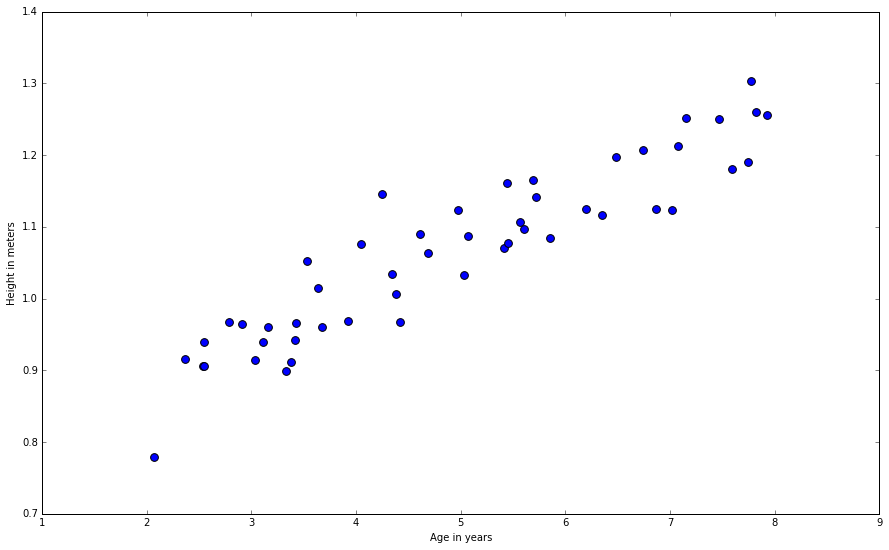

In [17]:
plt.scatter(data[0].Age_in_years, data[1].Height_in_meters, s=60, c='b', marker='o')
plt.xlabel('Age in years')
plt.ylabel('Height in meters')
plt.xlim(1,9)
figsize(15, 9)

In [22]:
m=data[2]
n=2
X=np.c_[np.ones((m)),data[0].Age_in_years.values]
y=np.c_[data[1]]
thetha=np.zeros((n,1))


In [23]:
def cost_evaluate(X,Y, thetha, m):
    h=np.dot(X,thetha)
    J=(np.sum(np.square(h-Y)))/2*m
    return J,h
    
    

In [24]:
Jfirst,h=cost_evaluate(X,y, thetha, m)

In [25]:
def gradient_evaluate(X,y,thetha,m,Jold,alpha=0.07):
    J={}
    h=np.dot(X,thetha)
    for i in xrange(1000):
        J[i]=Jold
        thetha=thetha-((np.dot(X.T,(h-y))*alpha)/m)
        Jnew,h=cost_evaluate(X,y, thetha,m)
        if abs(Jold-Jnew)<0.0000001:
            break
        else:
            Jold=Jnew
    return thetha,J
    
        
        

In [26]:
Thetha,J=gradient_evaluate(X,y,thetha,m,Jfirst)

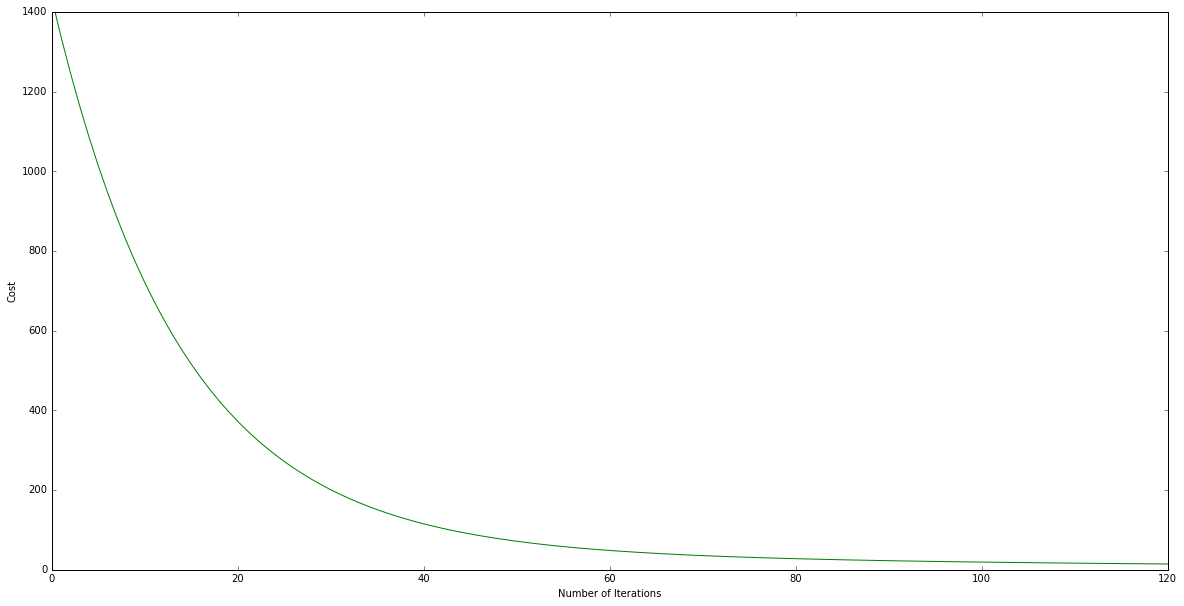

In [28]:
plt.plot(J.keys(),J.values(), color = 'g')
plt.ylabel('Cost')
plt.xlabel('Number of Iterations')
plt.ylim(0,1400)
plt.xlim(0,120)
figsize(20,10)

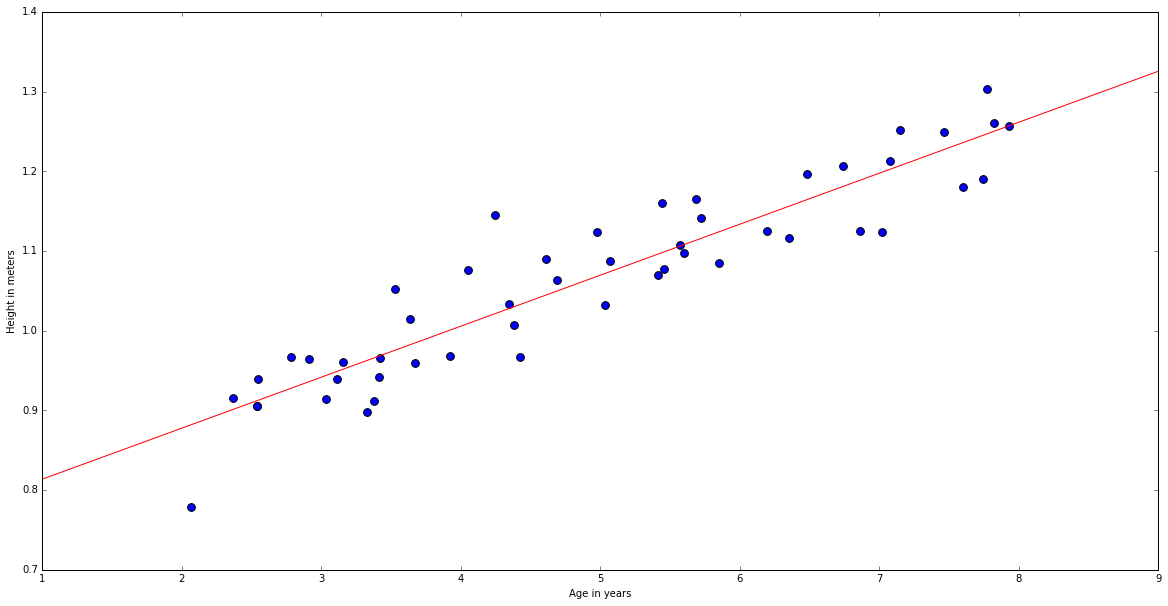

In [245]:
plt.scatter(data[0].Age_in_years, data[1].Height_in_meters, s=60, c='b', marker='o')
plt.xlabel('Age in years')
plt.ylabel('Height in meters')
plt.xlim(1,9)
x1 = np.arange(1,10)
y1 = Thetha[0] + Thetha[1] * x1
plt.plot(x1,y1, label='Linear regression (Gradient descent)', color = 'r')
figsize(10,6)